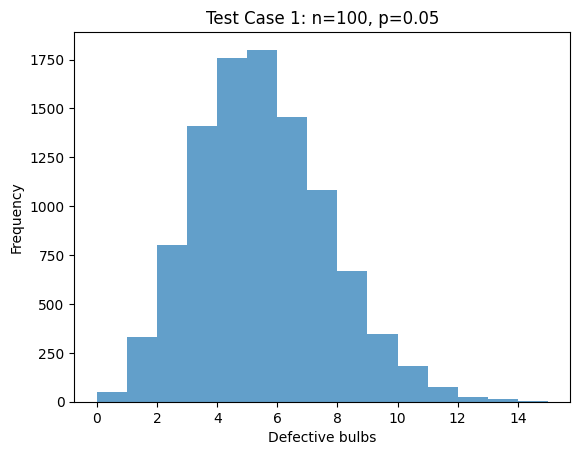

=== Test Case 1 ===
Mode: 5
P(X < 3) Simulation: 0.11820
P(X < 3) Exact: 0.11826



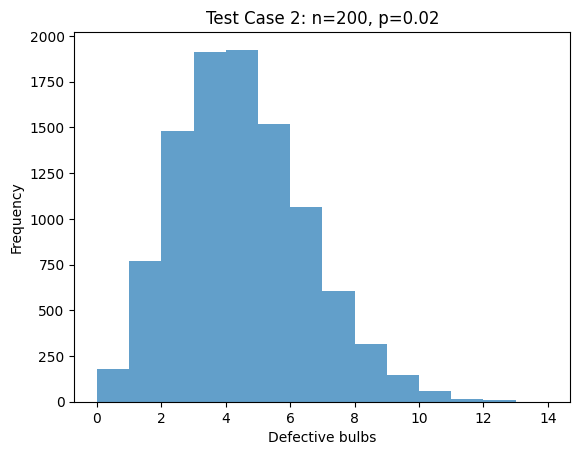

=== Test Case 2 ===
Expected Mean: 4.00, Variance: 3.92
P(X = 0) Simulation: 0.01790, Exact: 0.01759
P(X > 10) Simulation: 0.00230, Exact: 0.00253



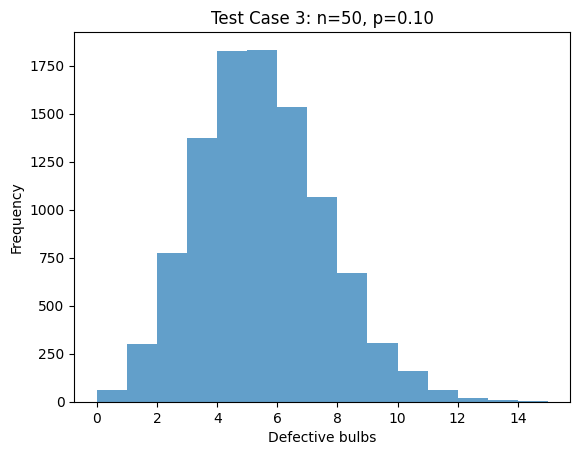

=== Test Case 3 ===
Mode: 5
P(X ≥ 8) Simulation: 0.12330, Exact: 0.12215



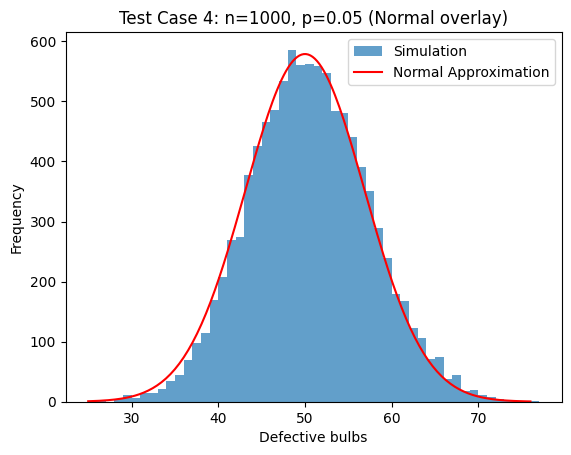

=== Test Case 4 ===
Mean: 50.00, Variance: 47.50
P(40 ≤ X ≤ 60) Simulation: 0.87060
P(40 ≤ X ≤ 60) Normal Approximation: 0.87237


In [ ]:
# -----------------------------------------------------------
# BINOMIAL SIMULATION – Light Bulb Quality Inspection
# -----------------------------------------------------------
# Purpose: Simulate defective bulb counts and analyze probabilities


import numpy as np
import matplotlib.pyplot as plt
import math
from math import comb, erf, sqrt, exp, pi

# ---- Helper Functions ----
def binom_pmf(k, n, p):
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

def binom_cdf(k, n, p):
    return sum(binom_pmf(i, n, p) for i in range(0, k+1))

def mode_binomial(n, p):
    m = math.floor((n+1)*p)
    return m

def normal_cdf(x, mu, sigma):
    return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

# ---- Common settings ----
TRIALS = 10000

# ===========================================================
# TEST CASE 1 – Baseline (p=0.05, n=100)
# ===========================================================
p1, n1 = 0.05, 100
samples1 = np.random.binomial(n1, p1, TRIALS)

mode1 = mode_binomial(n1, p1)
p_less3_sim = np.mean(samples1 < 3)
p_less3_exact = sum(binom_pmf(k, n1, p1) for k in range(3))

plt.hist(samples1, bins=range(min(samples1), max(samples1)+2), alpha=0.7)
plt.title("Test Case 1: n=100, p=0.05")
plt.xlabel("Defective bulbs")
plt.ylabel("Frequency")
plt.show()

print("=== Test Case 1 ===")
print(f"Mode: {mode1}")
print(f"P(X < 3) Simulation: {p_less3_sim:.5f}")
print(f"P(X < 3) Exact: {p_less3_exact:.5f}\n")


# ===========================================================
# TEST CASE 2 – Higher Quality (p=0.02, n=200)
# ===========================================================
p2, n2 = 0.02, 200
samples2 = np.random.binomial(n2, p2, TRIALS)

mean2 = n2 * p2
var2 = n2 * p2 * (1 - p2)
p_eq0_sim = np.mean(samples2 == 0)
p_eq0_exact = binom_pmf(0, n2, p2)
p_gt10_sim = np.mean(samples2 > 10)
p_gt10_exact = 1 - binom_cdf(10, n2, p2)

plt.hist(samples2, bins=range(min(samples2), max(samples2)+2), alpha=0.7)
plt.title("Test Case 2: n=200, p=0.02")
plt.xlabel("Defective bulbs")
plt.ylabel("Frequency")
plt.show()

print("=== Test Case 2 ===")
print(f"Expected Mean: {mean2:.2f}, Variance: {var2:.2f}")
print(f"P(X = 0) Simulation: {p_eq0_sim:.5f}, Exact: {p_eq0_exact:.5f}")
print(f"P(X > 10) Simulation: {p_gt10_sim:.5f}, Exact: {p_gt10_exact:.5f}\n")


# ===========================================================
# TEST CASE 3 – Lower Quality (p=0.10, n=50)
# ===========================================================
p3, n3 = 0.10, 50
samples3 = np.random.binomial(n3, p3, TRIALS)

mode3 = mode_binomial(n3, p3)
p_ge8_sim = np.mean(samples3 >= 8)
p_ge8_exact = 1 - binom_cdf(7, n3, p3)

plt.hist(samples3, bins=range(min(samples3), max(samples3)+2), alpha=0.7)
plt.title("Test Case 3: n=50, p=0.10")
plt.xlabel("Defective bulbs")
plt.ylabel("Frequency")
plt.show()

print("=== Test Case 3 ===")
print(f"Mode: {mode3}")
print(f"P(X ≥ 8) Simulation: {p_ge8_sim:.5f}, Exact: {p_ge8_exact:.5f}\n")


# ===========================================================
# TEST CASE 4 – Large-Scale Inspection (p=0.05, n=1000)
# ===========================================================
p4, n4 = 0.05, 1000
samples4 = np.random.binomial(n4, p4, TRIALS)

mu4 = n4 * p4
sigma4 = math.sqrt(n4 * p4 * (1 - p4))
p_40_60_sim = np.mean((samples4 >= 40) & (samples4 <= 60))
p_40_60_normal = normal_cdf(60.5, mu4, sigma4) - normal_cdf(39.5, mu4, sigma4)

plt.hist(samples4, bins=range(min(samples4), max(samples4)+2), alpha=0.7, label='Simulation')
# Overlay Normal approximation
x = np.linspace(min(samples4), max(samples4), 200)
pdf = (1 / (sigma4 * math.sqrt(2 * math.pi))) * np.exp(-0.5 * ((x - mu4) / sigma4)**2)
plt.plot(x, pdf * len(samples4), label='Normal Approximation', color='red')
plt.title("Test Case 4: n=1000, p=0.05 (Normal overlay)")
plt.xlabel("Defective bulbs")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("=== Test Case 4 ===")
print(f"Mean: {mu4:.2f}, Variance: {sigma4**2:.2f}")
print(f"P(40 ≤ X ≤ 60) Simulation: {p_40_60_sim:.5f}")
print(f"P(40 ≤ X ≤ 60) Normal Approximation: {p_40_60_normal:.5f}")
